In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/content/drive/MyDrive/india_monuments'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 2.png
/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 9.png
/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 3 (1).png
/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 11.png
/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 3.png
/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 7.png
/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 3 (2).png
/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 5.png
/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 6.png
/content/drive/MyDrive/india_monuments/train/taj_mahal/taj 10.png
/content/drive/MyDrive/india_monuments/train/india_gate/Screenshot_20230217_224037.png
/content/drive/MyDrive/india_monuments/train/india_gate/Screenshot_20230217_224104.png
/content/drive/MyDrive/india_monuments/train/india_gate/Screenshot_20230217_224128.png
/content/drive/MyDrive/india_monuments/train/india_gate/Screenshot_20230217_224

In [ ]:
import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
path = "/content/drive/MyDrive/india_monuments"
# Walk through the directory and list number of files
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/india_monuments'.
There are 10 directories and 0 images in '/content/drive/MyDrive/india_monuments/train'.
There are 0 directories and 10 images in '/content/drive/MyDrive/india_monuments/train/taj_mahal'.
There are 0 directories and 9 images in '/content/drive/MyDrive/india_monuments/train/india_gate'.
There are 0 directories and 9 images in '/content/drive/MyDrive/india_monuments/train/hampi_virupaksha_temple'.
There are 1 directories and 7 images in '/content/drive/MyDrive/india_monuments/train/konark_temple'.
There are 0 directories and 7 images in '/content/drive/MyDrive/india_monuments/train/konark_temple/gateway_of_india'.
There are 0 directories and 10 images in '/content/drive/MyDrive/india_monuments/train/mysore_palace'.
There are 0 directories and 7 images in '/content/drive/MyDrive/india_monuments/train/red_fort'.
There are 0 directories and 10 images in '/content/drive/MyDrive/india_monuments/train/sanchi_stup

In [ ]:
# append the training and the testing paths to the original path
train_dir =  path + "/train/"
test_dir = path + "/test/"
train_dir

'/content/drive/MyDrive/india_monuments/train/'

In [ ]:
# get all the class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['gateway_of_india', 'hampi_virupaksha_temple', 'india_gate',
       'konark_temple', 'mysore_palace', 'red_fort', 'sanchi_stupa',
       'srirangam', 'taj_mahal', 'velankanni'], dtype='<U23')

In [ ]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class
    
  # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("on");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
    
  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

Image shape: (932, 1920, 4)


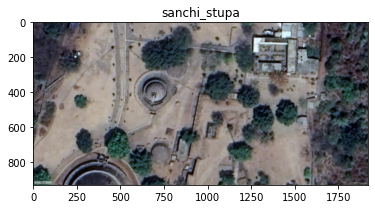

In [ ]:
#View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# # Create our model 
model_1 = Sequential([
   Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
   Conv2D(10, 3, activation='relu'),
   MaxPool2D(),
   Conv2D(10, 3, activation='relu'),
   Conv2D(10, 3, activation='relu'),
   MaxPool2D(),
   Flatten(),
   Dense(24, activation='softmax') 
 ])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(300, 300),
                                              batch_size=32,
                                              class_mode='categorical')

Found 103 images belonging to 10 classes.
Found 34 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

## Create our model 
model_1 = Sequential([
Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
Conv2D(10, 3, activation='relu'),
MaxPool2D(),
Conv2D(10, 3, activation='relu'),
Conv2D(10, 3, activation='relu'),
MaxPool2D(),
Flatten(),
Dense(24, activation='softmax') 
])

# # Compile the model
model_1.compile(loss="categorical_crossentropy", 
 optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

In [ ]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=10
                        ,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
4/4 [==============================] - 22s 6s/step - loss: 2.6518 - accuracy: 0.1359 - val_loss: 2.2016 - val_accuracy: 0.2059
Epoch 2/10
4/4 [==============================] - 18s 4s/step - loss: 1.8892 - accuracy: 0.3883 - val_loss: 1.6532 - val_accuracy: 0.5588
Epoch 3/10
4/4 [==============================] - 15s 5s/step - loss: 1.4962 - accuracy: 0.6311 - val_loss: 1.2433 - val_accuracy: 0.6176
Epoch 4/10
4/4 [==============================] - 16s 4s/step - loss: 1.0895 - accuracy: 0.6505 - val_loss: 0.9302 - val_accuracy: 0.8235
Epoch 5/10
4/4 [==============================] - 18s 6s/step - loss: 0.7487 - accuracy: 0.8155 - val_loss: 0.7068 - val_accuracy: 0.8235
Epoch 6/10
4/4 [==============================] - 15s 5s/step - loss: 0.4939 - accuracy: 0.8932 - val_loss: 0.5346 - val_accuracy: 0.9118
Epoch 7/10
4/4 [==============================] - 17s 4s/step - loss: 0.3651 - accuracy: 0.9126 - val_loss: 0.5763 - val_accuracy: 0.7647
Epoch 8/10
4/4 [==================

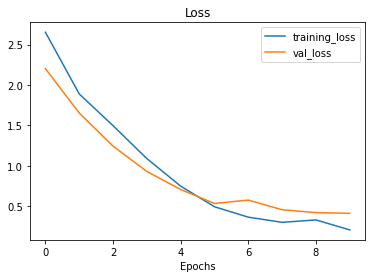

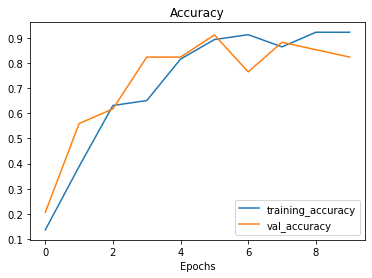

In [ ]:
plot_loss_curves(history_10)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=300):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
    
  return img
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 82ms/step


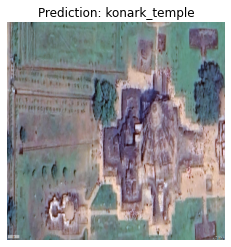

In [ ]:
# make a new prediction
pred_and_plot(model_10, "/content/drive/MyDrive/india_monuments/test/konark_temple/Screenshot_20230217_230452.png", class_names)

1/1 [==============================] - 0s 42ms/step


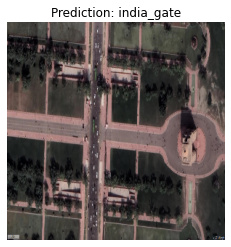

In [ ]:
# make a new prediction
pred_and_plot(model_10, "/content/drive/MyDrive/india_monuments/test/india_gate/Screenshot_20230217_225116.png", class_names)

1/1 [==============================] - 0s 41ms/step


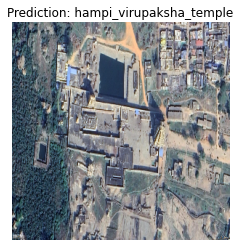

In [ ]:
# make a new prediction
pred_and_plot(model_10, "/content/drive/MyDrive/india_monuments/test/hampi_virupaksha_temple/Screenshot_20230217_112550.png", class_names)

1/1 [==============================] - 0s 39ms/step


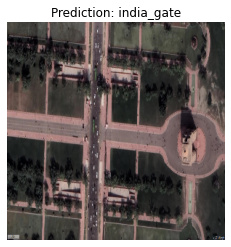

In [ ]:
# make a new prediction
pred_and_plot(model_10, "/content/drive/MyDrive/india_monuments/test/india_gate/Screenshot_20230217_225116.png", class_names)

1/1 [==============================] - 0s 41ms/step


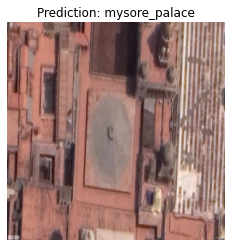

In [ ]:
# make a new prediction
pred_and_plot(model_10, "/content/drive/MyDrive/india_monuments/test/mysore_palace/Screenshot_20230217_211716.png", class_names)

1/1 [==============================] - 0s 42ms/step


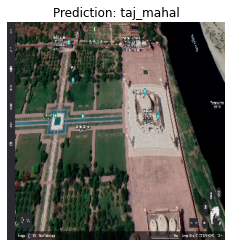

In [ ]:
#live satelite image prediction
pred_and_plot(model_10, "/content/drive/MyDrive/india_monuments/test/tajmahal.png", class_names)

1/1 [==============================] - 0s 41ms/step


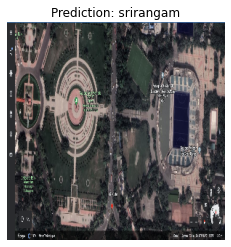

In [ ]:
 #live satelite image prediction
pred_and_plot(model_10, "/content/drive/MyDrive/india_monuments/test/Screenshot_20230218_142652.png", class_names)